# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [262]:
# student 1: Osher Kikirov 6100
# student 2: Alon Marianchik 5292
# student 3: Inbal Feust 4202

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [317]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np


In [318]:
data = pd.read_csv('wine_train.csv')
test_data = pd.read_csv('wine_test.csv')

In [319]:
X_train = data.drop(columns=['target'])
y_train = data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

In [320]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


In [321]:
X_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


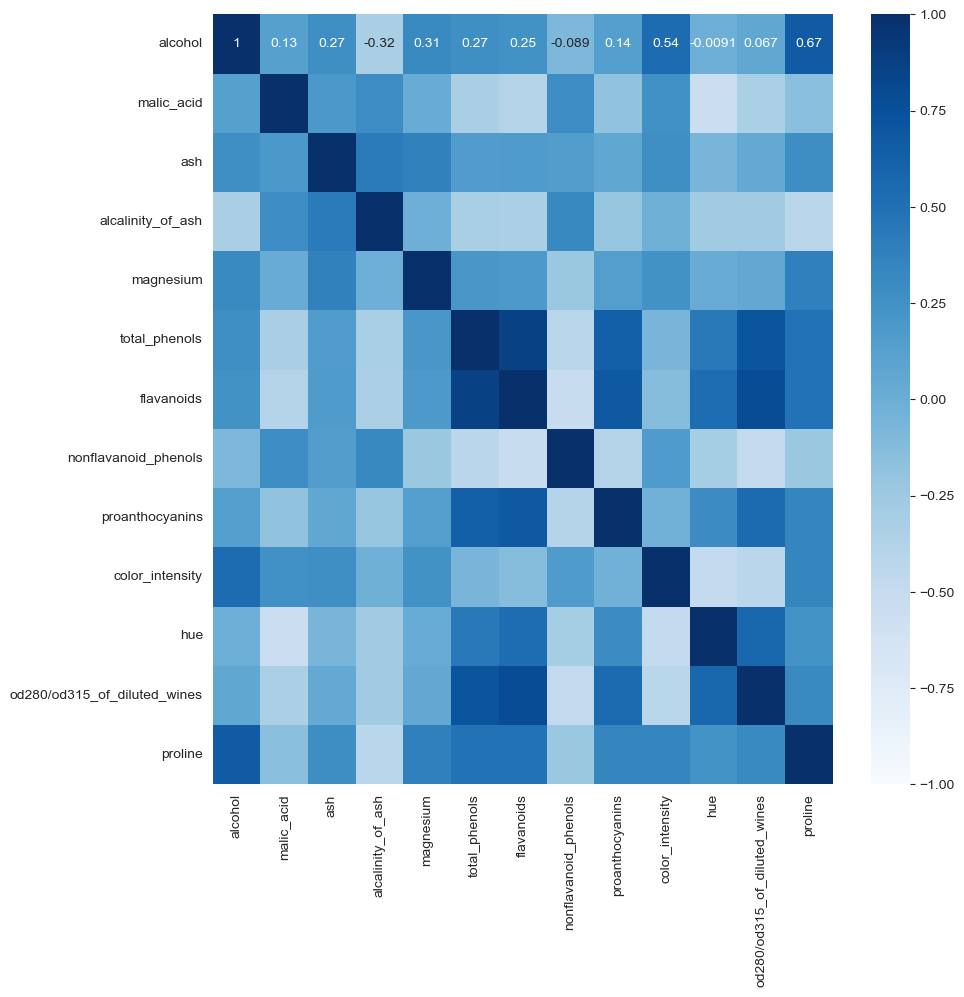

In [322]:
corr = X_train.corr()  # Calculate the correlation matrix
plt.figure(figsize=(10, 10))  # Set the figure size for better readability

sns.heatmap(corr, annot=True, annot_kws={"fontsize": 10}, vmin=-1, vmax=1, cmap='Blues')
plt.show()

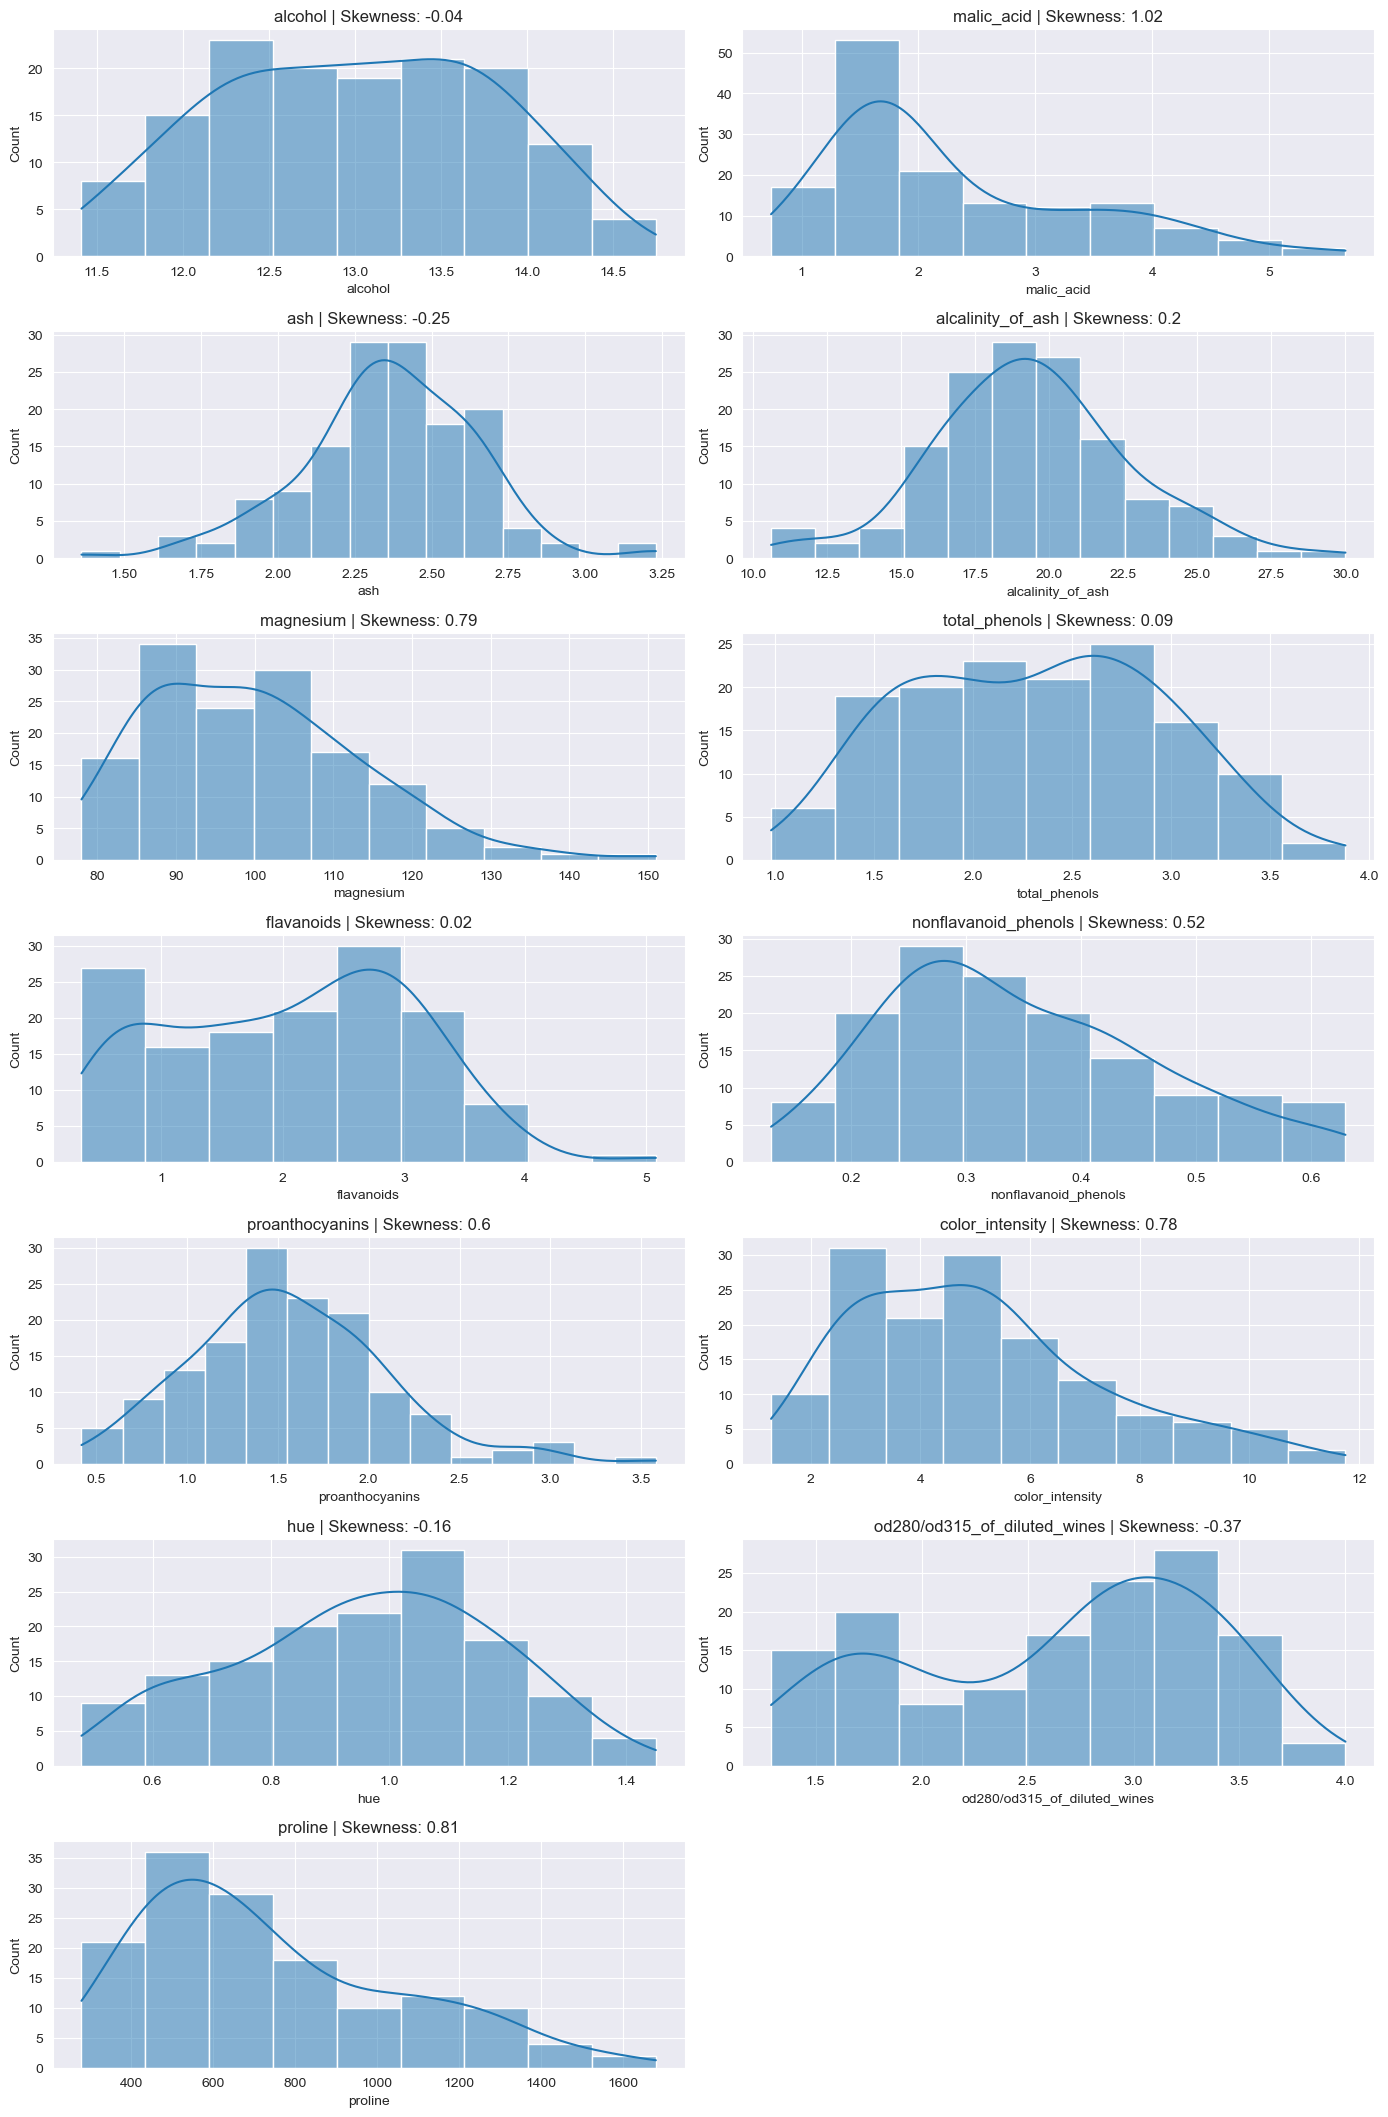

In [323]:
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(X_train[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(X_train[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

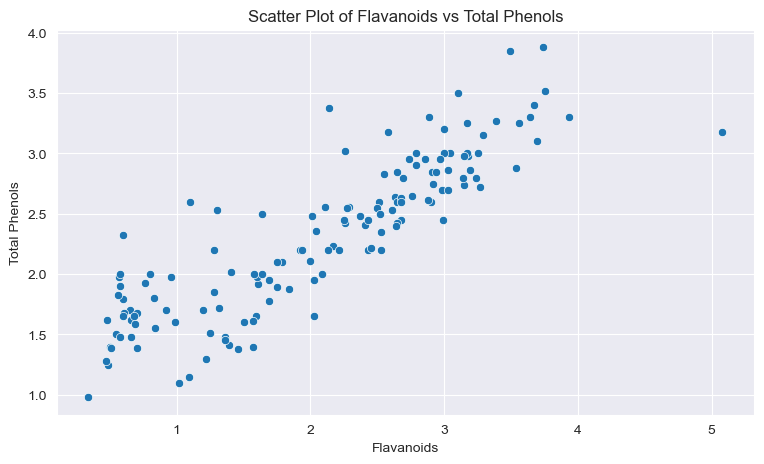

In [324]:
plt.figure(figsize=(9, 5))  # Set the size of the plot


# Create a scatter plot with flavanoids on the x-axis and total phenols on the y-axis, using custom colors based on target class
sns.scatterplot(x='flavanoids', y='total_phenols',  data=X_train)  

plt.title('Scatter Plot of Flavanoids vs Total Phenols')  # Add a title to the plot
plt.xlabel('Flavanoids')  # Label for x-axis
plt.ylabel('Total Phenols')  # Label for y-axis
plt.show()  

In [325]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000


## Part 3 - Experiments
You could add as many code cells as needed

In [326]:
# Initialize a copy of X_train to avoid modifying the original dataframe
X_train_no_outliers = X_train.copy()

# Loop through each column in the DataFrame
for col in X_train.columns:
    # Only process numeric columns (excluding any non-numeric ones)
    if pd.api.types.is_numeric_dtype(X_train[col]):
        # Calculate the z-score for the column
        zscore = (X_train[col] - X_train[col].mean()) / X_train[col].std()
        
        # Add the z-score to the DataFrame (optional, for inspection purposes)
        X_train_no_outliers[f'zscore_{col}'] = zscore
        
        # Filter out rows where z-score is outside the range -3 to 3 (outliers)
        X_train_no_outliers = X_train_no_outliers[(zscore > -3) & (zscore < 3)]

# Drop the z-score columns from the DataFrame (optional, if you don't need them)
X_train_no_outliers = X_train_no_outliers.drop(columns=[col for col in X_train_no_outliers.columns if 'zscore_' in col])

y_train_no_outliers = y_train.loc[X_train_no_outliers.index]


print(f"Number of rows before removing outliers: {X_train.shape[0]}")
print(f"Number of rows after removing outliers: {X_train_no_outliers.shape[0]}")


Number of rows before removing outliers: 142
Number of rows after removing outliers: 134


In [327]:
cov_mat = X_train_no_outliers.cov()  # Covariance matrix
corr_mat = X_train_no_outliers.corr()  # Correlation matrix for the features

# Correlation with the target (y_train)
corr_with_target = X_train_no_outliers.apply(lambda x: x.corr(y_train_no_outliers))

# Set a threshold for selecting highly correlated features with the target
threshold = 0.7
best_features = corr_with_target[abs(corr_with_target) > threshold].index

# Print selected features based on the threshold
print(f"Selected features: {best_features}")

# Selecting features into x for the model:
x = X_train_no_outliers[best_features]

# Scaling the features:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA to reduce dimensionality:
print(f"Shape \033[1mBefore\033[0m PCA: {x_scaled.shape}")
pca = PCA(n_components=0.95)  # Keeping 95% of the variance
x_pca = pca.fit_transform(x_scaled)
print(f"Shape \033[1mafter\033[0m PCA: {x_pca.shape}")


Selected features: Index(['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines'], dtype='object')
Shape Before PCA: (134, 3)
Shape after PCA: (134, 2)


In [328]:
# SVM Pipeline
pipeline_svm = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

# Random Forest Pipeline
pipeline_rf = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])

# Logistic Regression Pipeline
pipeline_logreg = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=1000))])

In [329]:
# Create a model parameters dictionary for each pipeline
model_params = {
    'svm': {
        'model': pipeline_svm,
        'params': {
            'classifier__C': [1, 10, 20],
            'classifier__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': pipeline_rf,
        'params': {
            'classifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': pipeline_logreg,
        'params': {
            'classifier__C': [1, 5, 10]
        }
    }
}


In [330]:
scores = []
best_models = {}
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_pca, y_train_no_outliers)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_models[model_name] = clf.best_estimator_
    
df_after = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947578,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.970085,{'n_estimators': 10}
2,logistic_regression,0.955271,{'C': 1}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [358]:
best_rf_params = best_models['random_forest'].get_params()

# Create a new Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_rf_params['classifier__n_estimators'],
    max_depth=best_rf_params['classifier__max_depth'],
    min_samples_split=best_rf_params['classifier__min_samples_split']
)

# Feature engineering pipeline
pipeline_rf_final = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', best_rf_model)
])

# Train the model on the full training data
pipeline_rf_final.fit(X_train_no_outliers, y_train_no_outliers)

# Evaluate the model on the test set
rf_y_pred = pipeline_rf_final.predict(X_train)
rf_f1_macro = f1_score(y_train, rf_y_pred, average='macro')
print("Final Random Forest F1 Macro Score on Test Set:", rf_f1_macro)
print("Final Random Forest Classification Report:")
print(classification_report(y_train, rf_y_pred))

Final Random Forest F1 Macro Score on Test Set: 0.9808899808899808
Final Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.95      0.97        57
           2       1.00      1.00      1.00        37

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



## Part 5 - Apply on test and show model performance estimation

In [357]:
pipeline_rf_final.fit(X_test, y_test)

y_test_pred = pipeline_rf_final.predict(X_test)


first_5_predictions = pd.DataFrame({
    'True Label': y_test[:5].values,
    'Predicted Label': y_test_pred[:5]
})

print("First 5 Test Examples - True vs Predicted Labels:")
print(first_5_predictions)


f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
print(f"Random Forest F1 Macro Score on Test Set: {f1_macro_test}")



print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))




First 5 Test Examples - True vs Predicted Labels:
   True Label  Predicted Label
0           2                2
1           0                0
2           2                2
3           1                1
4           2                2
Random Forest F1 Macro Score on Test Set: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

